# COMPUTER VISION

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils

## 2. Module Image Stitching
1. Class:
* cv2.Stitcher();
* cv2.Timelapser()



### 2.1 Image stitching


In [14]:
stitcher = cv2.Stitcher_create()

In [5]:
pano1 = cv2.imread('DATA/raw/pano1.png')
pano2 = cv2.imread('DATA/raw/pano2.png')
pano3 = cv2.imread('DATA/raw/pano3.png')
pano1.shape,pano2.shape,pano3.shape

((187, 252, 3), (187, 250, 3), (187, 250, 3))

In [13]:
pano1 = pano1[:,:250,:]
pano1.shape,pano2.shape,pano3.shape
panos = []
panos.append(pano1)
panos.append(pano2)
panos.append(pano3)
len(panos)

3

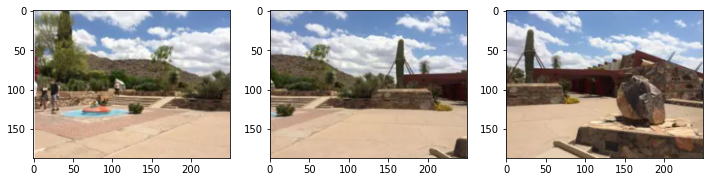

In [10]:
fig, ax = plt.subplots(1,3,figsize = (12,8))
ax[0].imshow(cv2.cvtColor(pano1,cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(pano2,cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(pano3,cv2.COLOR_BGR2RGB))

In [15]:
(status, stitched) = stitcher.stitch(panos)

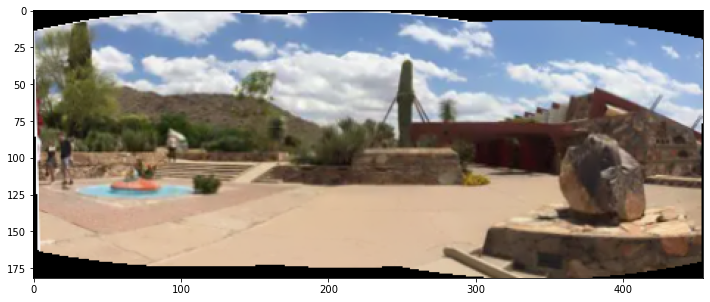

In [21]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(stitched,cv2.COLOR_BGR2RGB))

In [23]:
# if the status is '0', then OpenCV successfully performed image
# stitching
if status == 0:

	stitched = cv2.copyMakeBorder(stitched, 10, 10, 10, 10,
		cv2.BORDER_CONSTANT, (0, 0, 0))
	# convert the stitched image to grayscale and threshold it
	# such that all pixels greater than zero are set to 255
	# (foreground) while all others remain 0 (background)
	gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
	thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

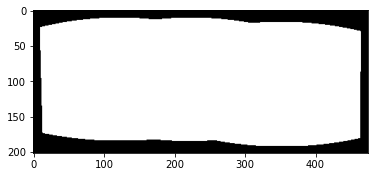

In [33]:
plt.figure(figsize=(6,4))
plt.imshow(thresh,cmap='gray')

In [27]:
# find all external contours in the threshold image then find
# the *largest* contour which will be the contour/outline of
# the stitched image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
# allocate memory for the mask which will contain the
# rectangular bounding box of the stitched image region
mask = np.zeros(thresh.shape, dtype="uint8")
(x, y, w, h) = cv2.boundingRect(c)
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

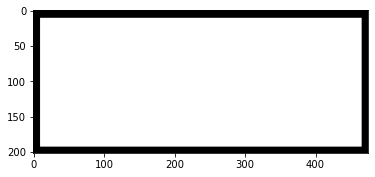

In [34]:
plt.figure(figsize=(6,4))
plt.imshow(mask,cmap='gray')

In [29]:
# create two copies of the mask: one to serve as our actual
# minimum rectangular region and another to serve as a counter
# for how many pixels need to be removed to form the minimum
# rectangular region
minRect = mask.copy()
sub = mask.copy()
# keep looping until there are no non-zero pixels left in the
# subtracted image
while cv2.countNonZero(sub) > 0:
	# erode the minimum rectangular mask and then subtract
	# the thresholded image from the minimum rectangular mask
	# so we can count if there are any non-zero pixels left
	minRect = cv2.erode(minRect, None)
	sub = cv2.subtract(minRect, thresh)

In [30]:
# find contours in the minimum rectangular mask and then
# extract the bounding box (x, y)-coordinates
cnts = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
(x, y, w, h) = cv2.boundingRect(c)
# use the bounding box coordinates to extract the our final
# stitched image
stitched = stitched[y:y + h, x:x + w]

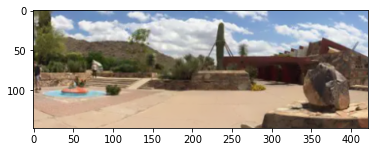

In [35]:
plt.figure(figsize=(6,4))
plt.imshow(cv2.cvtColor(stitched,cv2.COLOR_BGR2RGB))